In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Flipkart/flipkart_com-ecommerce_sample_1050.csv")

In [8]:
df["category_name"] = df["product_category_tree"].str.split(r">>", regex=False, expand=True)[0]
df["category_name"] = df["category_name"].str.replace('["', '')
df = df[['description', 'category_name']].dropna(subset=['description', 'category_name'])

In [9]:
df['category_name'].value_counts()

,count
category_name,
Home Furnishing,150
Baby Care,150
Watches,150
Home Decor & Festive Needs,150
Kitchen & Dining,150
Beauty and Personal Care,150
Computers,150


*****************************************************

**Ajout des images dans des sous dossiers spécifiques à leur catégorie**

*****************************************************


In [12]:
from sklearn.model_selection import train_test_split
from transformers import DistilBertTokenizer, TFDistilBertModel
import numpy as np
from sklearn.ensemble import RandomForestClassifier

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")

def encode_text(text):
    inputs = tokenizer(text, return_tensors="tf", truncation=True, padding=True, max_length=128)
    outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy().squeeze()

# Encoder toutes les descriptions
df['description_vector'] = df['description'].apply(encode_text)

# Préparer les données d'entraînement et les étiquettes
X = np.vstack(df['description_vector'].values)
y = df['category_name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le classificateur Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBert

RandomForestClassifier(random_state=42)

Précision du modèle sur les données de test : 0.88
                                           description  \
948  Arabian Nights Soex Cranberry Assorted Hookah ...   
971  Key Features of Sparklings Cotton Geometric Do...   
395  Flipkart.com: Buy Nike Orange Combo Set online...   
803  Buy Rega IT Hp Pavilion G6-1240SG G6-1241EA (6...   
733  Buy Canon Toner Cartridge 416 Black only for R...   
134  Buy Rajesh Digital BEST DAD 107 Ceramic Mug fo...   
922  Buy Agrasen International Radha Krishna Statue...   
179  Rockmantra Beautiful Girl With Big Feather Hat...   
582  Flippd FD040149 Casual Analog Watch  - For Wom...   
782  Perucci Pc-122 & Pc-126 Decker Analog Watch  -...   

                   category_name             category_predict  
948  Home Decor & Festive Needs   Home Decor & Festive Needs   
971                   Baby Care                    Baby Care   
395    Beauty and Personal Care     Beauty and Personal Care   
803                   Computers                    Com

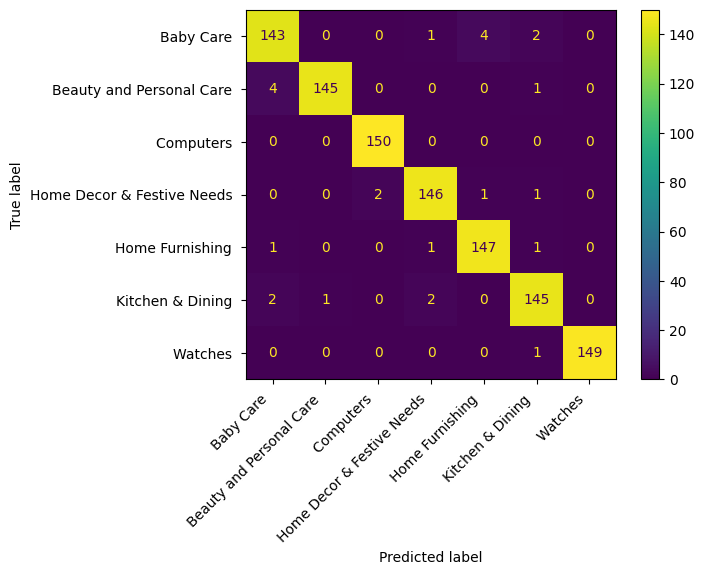

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Faire des prédictions et évaluer le modèle
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle sur les données de test : {accuracy:.2f}")

# Prédire les catégories sur l'ensemble du dataset
df['category_predict'] = clf.predict(np.vstack(df['description_vector'].values))

# Afficher un échantillon de prédictions pour vérifier
print(df[['description', 'category_name', 'category_predict']].sample(10))

# Calculer la précision globale et afficher les erreurs
accuracy = (df['category_name'] == df['category_predict']).mean()
print(f"Précision globale du modèle : {accuracy:.2f}")

# Afficher les erreurs
errors = df[df['category_name'] != df['category_predict']]
print("Nombre d'erreurs :", len(errors))
print(errors[['description', 'category_name', 'category_predict']].head(10))

# Rapport de classification
print(classification_report(df['category_name'], df['category_predict']))

# Afficher la matrice de confusion avec les étiquettes inclinées
disp = ConfusionMatrixDisplay.from_predictions(df['category_name'], df['category_predict'])
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

**IMAGE CLASSIFICATION**

In [17]:
import os
import shutil
import tensorflow as tf

# Chemin vers le répertoire contenant les images
data_path = '/content/drive/MyDrive/Flipkart/flipkart_com-ecommerce_sample_1050.csv'
data = pd.read_csv(data_path)
base_dir = '/content/drive/MyDrive/Flipkart/Images'


# Créer les sous-dossiers de catégories s'ils n'existent pas
# for category in df['category_name'].unique():
#    category_path = os.path.join(base_dir, category)
#    if not os.path.exists(category_path):  # Vérification de l'existence du sous-dossier
#        os.makedirs(category_path)
#    else:
#        print(f"Le sous-dossier '{category}' existe déjà.")

# Déplacer chaque image dans le dossier de sa catégorie
# for _, row in df.iterrows():
#    src_path = os.path.join(base_dir, row['image'])  # chemin d'origine de l'image
#    dest_path = os.path.join(base_dir, row['category_name'], row['image'])  # chemin de destination
#    if os.path.exists(src_path):  # vérifier si le fichier existe pour éviter les erreurs
#        shutil.move(src_path, dest_path)
#    else:
#        print(f"Image non trouvée : {src_path}")

#print("Images regroupées par catégorie.")

img_size = (224, 224)
batch_size = 32

# Chargement des images depuis le répertoire avec partition en ensembles d’entraînement et de validation
train_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Flipkart/Images',
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Flipkart/Images',
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

Found 1050 files belonging to 7 classes.
Using 840 files for training.
Found 1050 files belonging to 7 classes.
Using 210 files for validation.


In [18]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
])

# Normalisation pour correspondre à l'entraînement ImageNet
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(data_augmentation(x)), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

In [22]:
from tensorflow.keras.applications import EfficientNetB0  # Remplacer par InceptionV3 si nécessaire
from tensorflow.keras import layers, Model

# Chargement du modèle pré-entraîné sans la dernière couche de classification
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Congélation des poids du modèle de base pour un fine-tuning minimal
base_model.trainable = False

# Ajout des nouvelles couches
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dropout(0.2)(x)  # Regularisation pour éviter l'overfitting
output = layers.Dense(train_dataset.cardinality().numpy(), activation='softmax')(x)  # Nombre de classes

# Construction du modèle
model = Model(inputs=base_model.input, outputs=output)

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10  # Vous pouvez ajuster le nombre d'époques
)


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 161s 5s/step - accuracy: 0.1125 - loss: 2.9487 - val_accuracy: 0.1333 - val_loss: 2.3239
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.1452 - loss: 2.2302 - val_accuracy: 0.1333 - val_loss: 2.1008
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.1554 - loss: 2.0702 - val_accuracy: 0.1048 - val_loss: 2.0390
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.1233 - loss: 2.0270 - val_accuracy: 0.1048 - val_loss: 2.0133
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.1215 - loss: 2.0035 - val_accuracy: 0.1286 - val_loss: 1.9980
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.1692 - loss: 1.9854 - val_accuracy: 0.1333 - val_loss: 1.9882
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.1354 - loss: 1.9831 - val_accuracy: 0.1286 - val_loss: 1.9802
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.1483 - loss: 1.9797 - val_accuracy: 0.1048 - val_loss

In [26]:
from sklearn.preprocessing import LabelEncoder

# Création du modèle combiné
text_model_output = tf.keras.layers.Input(shape=(768,), name='text_input')  # La taille du vecteur de DistilBERT est 768
image_model_output = tf.keras.layers.Input(shape=(img_size[0], img_size[1], 3), name='image_input')

# Passer l'entrée d'image à EfficientNet
base_output = base_model(image_model_output)

# Aplatir la sortie d'EfficientNet
base_output_flat = layers.Flatten()(base_output)

# Fusion des sorties
x_combined = layers.Concatenate()([text_model_output, base_output_flat])

# Ajout de couches supplémentaires pour le modèle de fusion
x_combined = layers.Dense(128, activation='relu')(x_combined)
x_combined = layers.Dropout(0.2)(x_combined)
final_output = layers.Dense(train_dataset.cardinality().numpy(), activation='softmax')(x_combined)  # Nombre de classes

# Construction du modèle combiné
combined_model = Model(inputs=[text_model_output, image_model_output], outputs=final_output)

# Compilation du modèle combiné
combined_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Préparer les données d'entraînement et de validation en tant que tableaux NumPy
X_image_train = np.concatenate([x.numpy() for x, _ in train_dataset])
y_image_train = np.concatenate([y.numpy() for _, y in train_dataset])

X_image_val = np.concatenate([x.numpy() for x, _ in validation_dataset])
y_image_val = np.concatenate([y.numpy() for _, y in validation_dataset])

# Encoder les étiquettes
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Entraîner le modèle combiné
combined_model.fit(
    [X_train, X_image_train],  # Entrées : vecteurs de texte et tableaux d'images
    y_train_encoded,  # Utiliser les étiquettes encodées
    validation_data=([X_test, X_image_val], y_test_encoded),  # Validation avec les données de validation
    epochs=10  # Vous pouvez ajuster le nombre d'époques
)


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.1266 - loss: 5.6944 - val_accuracy: 0.1429 - val_loss: 2.7411
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.1340 - loss: 2.8663 - val_accuracy: 0.1571 - val_loss: 2.7560
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.1344 - loss: 2.7221 - val_accuracy: 0.1571 - val_loss: 2.5659
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.1523 - loss: 2.6125 - val_accuracy: 0.0905 - val_loss: 2.2403
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.1219 - loss: 2.3383 - val_accuracy: 0.2000 - val_loss: 2.1561
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.1403 - loss: 2.2706 - val_accuracy: 0.1000 - val_loss: 1.9778
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.1725 - loss: 2.2368 - val_accuracy: 0.2667 - val_loss: 1.9978
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.2082 - loss: 2.1204 - val_accuracy: 0.1619 - val_loss: